In [1]:
%pwd

'e:\\PROJECTS\\ML\\Brain-Tumor-Image-Classfication\\notebook'

In [2]:
%cd ..

e:\PROJECTS\ML\Brain-Tumor-Image-Classfication


c:\Users\reza\miniconda3\envs\brainMRI\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
%pwd

'e:\\PROJECTS\\ML\\Brain-Tumor-Image-Classfication'

In [4]:
from dataclasses import dataclass
from typing import Tuple
import tensorflow as tf
from brainMRI.logging import logger
import matplotlib.pyplot as plt
from pathlib import Path
@dataclass
class DataAugmentation:
    training_dir: Path
    random_flip_horizontal: bool = True
    random_flip_vertical: bool = False
    random_rotation: bool = True
    random_zoom_height: bool = True
    random_zoom_width: bool = False
    random_brightness: bool = True
    random_contrast: bool = True
    random_translation_height: bool = True
    random_translation_width: bool = True
    random_rotation_factor: float = .2
    random_zoom_height_factor: float = .2
    random_zoom_width_factor: float = 0
    random_brightness_factor: float = .2
    random_contrast_lower_factor: float = .8
    random_contrast_upper_factor: float = 1.2
    random_translation_height_factor: float = .2
    random_translation_width_factor: float = .2



    def show_aug(self, data_augmentation):
        plt.figure(figsize=(10, 10))
        train_ds = tf.data.Dataset.load(self.training_dir)
       
        for image, _ in train_ds.take(1):
            plt.figure(figsize=(10, 10))
            first_image = image[0]
            for i in range(9):
                ax = plt.subplot(3, 3, i + 1)
                augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
                plt.imshow(augmented_image[0] / 255)
                plt.axis('off')

    def augmentation(self) -> tf.keras.Sequential:
        """
        Builds a data augmentation pipeline using the configuration stored in the dataclass.

        Returns:
            tf.keras.Sequential: The data augmentation pipeline.
        """
        
        logger.info("Building data augmentation pipeline...")
        data_augmentation = tf.keras.Sequential([])

        if self.random_flip_horizontal or self.random_flip_vertical:
            mode = ''
            if self.random_flip_horizontal and self.random_flip_vertical:
                mode = 'horizontal_and_vertical'
            elif self.random_flip_horizontal:
                mode = "horizontal"
            else:
                mode = "vertical"
            data_augmentation.add(tf.keras.layers.RandomFlip(mode=mode))
            logger.info(f"Added random flip layer with mode: {mode}")

        if self.random_rotation:
            data_augmentation.add(tf.keras.layers.RandomRotation(self.random_rotation_factor))
            logger.info(f"Added random rotation layer with factor: {self.random_rotation_factor}")

        if self.random_zoom_height or self.random_zoom_width:
            data_augmentation.add(tf.keras.layers.RandomZoom(self.random_zoom_height_factor if self.random_zoom_height else 0, self.random_zoom_width_factor if self.random_zoom_width else 0))
            logger.info(f"Added random zoom layer with height factor: {self.random_zoom_height_factor} and width factor: {self.random_zoom_width_factor}")

        if self.random_brightness:
            data_augmentation.add(tf.keras.layers.RandomBrightness(self.random_brightness_factor))
            logger.info(f"Added random brightness layer with factor: {self.random_brightness_factor}")

        if self.random_contrast:
            data_augmentation.add(tf.keras.layers.RandomContrast((self.random_contrast_lower_factor, self.random_contrast_upper_factor)))
            logger.info(f"Added random contrast layer with lower factor: {self.random_contrast_lower_factor} and upper factor: {self.random_contrast_upper_factor}")

        if self.random_translation_height or self.random_translation_width:
            data_augmentation.add(tf.keras.layers.RandomTranslation(self.random_translation_height_factor if self.random_translation_height else 0,
                                                                    self.random_translation_width_factor if self.random_translation_width else 0))
            logger.info(f"Added random translation layer with height factor: {self.random_translation_height_factor} and width factor: {self.random_translation_width_factor}")

        logger.info("Data augmentation pipeline built successfully.")
        
        logger.info("Data augmentation pipeline summary:")
        data_augmentation.summary(print_fn=lambda x: logger.info(x))

        return data_augmentation

In [5]:
from brainMRI.constants import *
from brainMRI.utils.helpers import load_config, create_directories
class ConfigHandler:
    def __init__(self, file_path=CONFIG_FILE_PATH, params_path = PARAMS_FILE_PATH):
        self.config = load_config(file_path)
        self.params = load_config(params_path)
        create_directories([self.config.root_dir])

    
    def get_data_augmentation_config(self) -> DataAugmentation:
        params = self.params.data_augmentation
        config = self.config.data_augmentation
        data_augmentation_config = DataAugmentation(
            training_dir= config.training_dir,
            random_flip_horizontal= params.random_flip_horizontal,
            random_flip_vertical= params.random_flip_vertical,
            random_rotation= params.random_rotation,
            random_zoom_height= params.random_zoom_height,
            random_zoom_width= params.random_zoom_width,
            random_brightness= params.random_brightness,
            random_contrast= params.random_contrast,
            random_translation_height= params.random_translation_height,
            random_translation_width= params.random_translation_width,
            random_rotation_factor= params.random_rotation_factor,
            random_zoom_height_factor= params.random_zoom_height_factor,
            random_zoom_width_factor= params.random_zoom_width_factor,
            random_brightness_factor= params.random_brightness_factor,
            random_contrast_lower_factor= params.random_contrast_lower_factor,
            random_contrast_upper_factor= params.random_contrast_upper_factor,
            random_translation_height_factor= params.random_translation_height_factor,
            random_translation_width_factor= params.random_translation_width_factor
        )
        return data_augmentation_config

[2024-06-01 11:03:11,856: INFO: helpers: YAML file: config\config.yaml loaded successfully]
[2024-06-01 11:03:11,872: INFO: helpers: YAML file: params.yaml loaded successfully]
[2024-06-01 11:03:11,875: INFO: helpers: Created directory at: project_outputs]
[2024-06-01 11:03:11,878: INFO: 3509855844: Building data augmentation pipeline...]
[2024-06-01 11:03:11,964: INFO: 3509855844: Added random flip layer with mode: horizontal]
[2024-06-01 11:03:11,973: INFO: 3509855844: Added random rotation layer with factor: 0.2]
[2024-06-01 11:03:11,981: INFO: 3509855844: Added random zoom layer with height factor: 0.2 and width factor: 0]
[2024-06-01 11:03:11,991: INFO: 3509855844: Added random brightness layer with factor: 0.2]
[2024-06-01 11:03:11,998: INFO: 3509855844: Added random contrast layer with lower factor: 0.8 and upper factor: 1.2]
[2024-06-01 11:03:12,008: INFO: 3509855844: Added random translation layer with height factor: 0.2 and width factor: 0.2]
[2024-06-01 11:03:12,010: INFO: 3

[2024-06-01 11:03:12,090: INFO: 3509855844: Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ ?                      │   0 (unbuilt) │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness               │ ?                      │   0 (unbuilt) │
│ (RandomBrightness)              │                        │               │
├───────────

<Figure size 1000x1000 with 0 Axes>

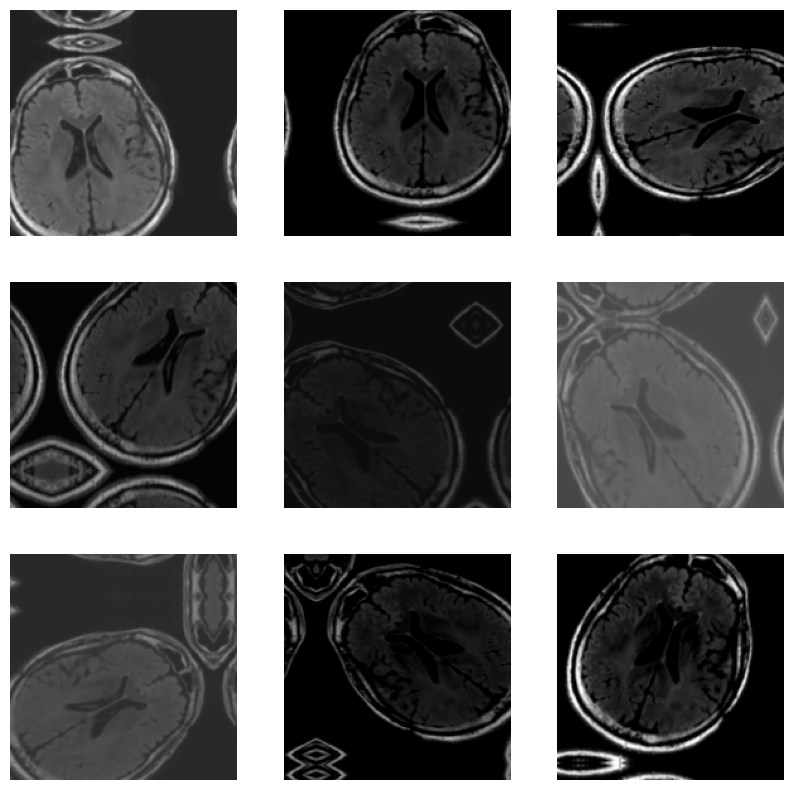

In [6]:
try:
    config = ConfigHandler()
    data_augmentation_config = config.get_data_augmentation_config()
    aug = data_augmentation_config.augmentation()
    data_augmentation_config.show_aug(aug)
except Exception as e:
    raise e